# Case Study: Customer Behaviour Analysis.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [77]:
### We will load the data using pandas as there are 2 different sheets in the file we'll load them in 2 dataframes and append them later as shown below

In [78]:
df1=pd.read_excel(r"C:\Users\satis\Downloads\customer_transactions_sample (1).xlsx",sheet_name='Year 2009-2010')
df2=pd.read_excel(r"C:\Users\satis\Downloads\customer_transactions_sample (1).xlsx",sheet_name='Year 2010-2011')

In [79]:
df=df1.append(df2)

## Exploratory Data Analysis 

In [80]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [81]:
### Let's check the shape of the dataset

In [82]:
print('Shape of the dataset:\n',df.shape)

Shape of the dataset:
 (1067371, 8)


In [83]:
### Let's check all the columns present in the dataset

In [84]:
print('columns:\n',df.columns)

columns:
 Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [86]:
### Let's check if there are some null or missing values in the data

In [87]:
print('check for missing values:\n',df.isnull().sum())

check for missing values:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [88]:
#### As we can see there are 4382 missing values in Description column and 243007 missing values in Customer ID column,we may need to address this before moving forward

In [89]:
print('Statistics Summary:\n',df.describe())

Statistics Summary:
            Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


In [90]:
### From the above statistics we can see that the min value in 'Quantity' column contains negative value which is unusual which might indicate there is an error similarly the Price column has also negative value which also seems unusal and requires further analysis

###  1. Data Cleaning
#### a. Handling Missing Values

#### First let's handle missing values we can do this by dropping the missing values or imputing them with artificial values
#### 1. For the column 'Description' I have dropped the missing values since there is no information that might be helpful for us to understand any customer behaviour or any customer sentiment without any description and also since the missing values are comparitively less I don't think it would affect the analysis.
#### 2. For the column 'Customer ID' there are few important information that will lost if we remove missing values which can be helpful for us in product segmentation and customer behaviour analysis and also since the volume of missing values is also quite high (close to 22%), I have decided to impute the missing values and retain the information.(Also since we have the invoice number we can say the purchase might be genuine so going ahead with all these points)

In [91]:
### We will be dropping the missing values in the Description column and impute values in the Customer ID column with placeholder -1

In [92]:
df.dropna(subset=['Description'], inplace=True)

In [93]:
df['Customer ID'].fillna(-1, inplace=True)

In [94]:
### Let's check for the missing values, as we can see there are no missing values shown below

In [95]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

###  2. Outlier Analysis,
#### As we can see there are some negative values in the Quantity and Price column as shown below.

In [96]:
df[df['Quantity']<0].shape,df[df['Price']<0].shape

((20261, 8), (5, 8))

#### 1.After going through the data and investigating the issue, I have found that there are instances in case of Quantity where for example The items might have been lost, damaged or refunded for which the price is 0, so I think it's fine if we remove data for these instances since the price is 0 for these it would not affect the sales and create any problems in our analysis.
#### 2.In the case of Price there are only 5 records where the price is negative and description is basically 'Adjust Bad Debt' they all come from 1 country and don't have any Customer ID as well so I think we can remove these records.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062989 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1062989 non-null  object        
 1   StockCode    1062989 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1062989 non-null  int64         
 4   InvoiceDate  1062989 non-null  datetime64[ns]
 5   Price        1062989 non-null  float64       
 6   Customer ID  1062989 non-null  float64       
 7   Country      1062989 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.0+ MB


In [98]:
df_cleaned = df[(df['Quantity'] >= 0) & (df['Price'] >= 0)]
df_cleaned.shape

(1042723, 8)

In [99]:
df_cleaned[df_cleaned['Quantity']<0].shape,df_cleaned[df_cleaned['Price']<0].shape

((0, 8), (0, 8))

In [100]:
df_cleaned.shape,df.shape

((1042723, 8), (1062989, 8))

In [101]:
### Now, we have a cleaned dataset ready for further analysis.

### 1.Sales Trend Analysis:

In [102]:
### Let's start by exploring the sales trends over time. We'll analyze the trend of sales on a monthly basis to identify any seasonality or trends in the data.

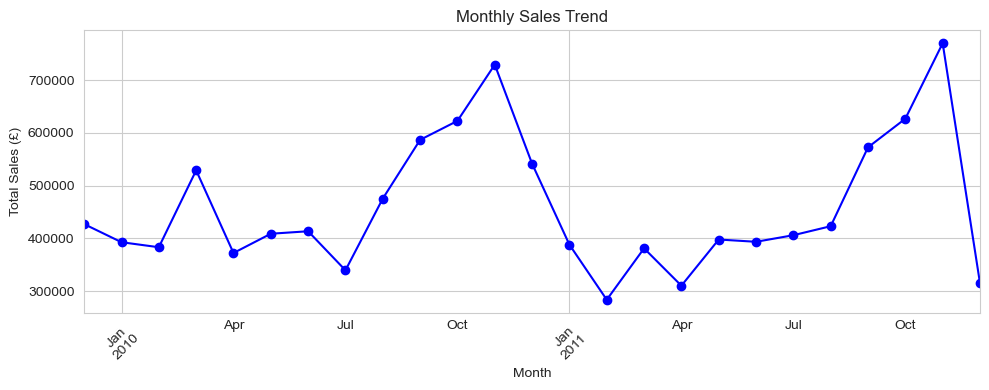

In [103]:
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

monthly_sales = df_cleaned.groupby('YearMonth')['Quantity'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
### Let's Calculate Revenue by multiplying Quantity and Price

In [105]:
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

In [106]:
df_cleaned.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Revenue
310982,564221,22378,WALL TIDY RETROSPOT,1,2011-08-24 09:36:00,4.96,-1.0,United Kingdom,2011-08,4.96
168575,551059,22355,CHARLOTTE BAG SUKI DESIGN,10,2011-04-26 12:08:00,0.85,13668.0,United Kingdom,2011-04,8.50
243523,512950,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-06-21 09:26:00,2.95,17593.0,United Kingdom,2010-06,17.70
79858,543010,22845,VINTAGE CREAM CAT FOOD CONTAINER,2,2011-02-02 13:16:00,6.35,18250.0,United Kingdom,2011-02,12.70
107425,545445,22898,CHILDRENS APRON APPLES DESIGN,8,2011-03-02 16:26:00,1.95,17738.0,United Kingdom,2011-03,15.60


In [107]:
### Let's also explore revenue trends over time. We'll analyze the trend of revenue on a monthly basis to identify any seasonality or trends in the data.

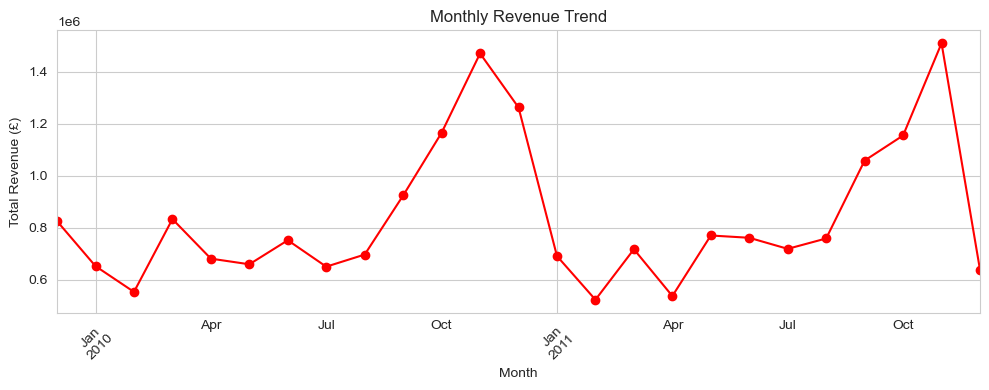

In [108]:
monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()

# Plot the monthly revenue trend
plt.figure(figsize=(10, 4))
monthly_revenue.plot(kind='line', marker='o', color='r')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### From the above graphs and tables we can conclude that if we compare sales and revenue month over month:
#### 1.We can see that the sales and revenue for the first half of the year is relatively low compared to second half of the year.
#### 2.Now if we look at the sales and revenue here in the graph, we can see the sales pick up from the month of september and keeps growing until november which is the peak,Then it goes back to low sales again in december.
#### 3.There is similar trend in both the Years 2010 and 2011 if we compare month over month so there is a seasonality factor starting from september to november this might be because of festivals and other reasons.

### 2.Popular Products Analysis:

In [109]:
product_sales=df_cleaned.groupby('Description').agg({'Quantity':'sum','Revenue':'sum'})


In [110]:
top_products_quantity = product_sales.sort_values(by='Quantity', ascending=False).head(10)
top_products_quantity

,Quantity,Revenue
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,110249,25259.90
WHITE HANGING HEART T-LIGHT HOLDER,96688,266923.55
ASSORTED COLOUR BIRD ORNAMENT,81817,132187.92
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
JUMBO BAG RED RETROSPOT,79285,150935.56
MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
BROCADE RING PURSE,71440,14959.19
PACK OF 60 PINK PAISLEY CAKE CASES,56794,28490.98
60 TEATIME FAIRY CAKE CASES,54716,27404.22


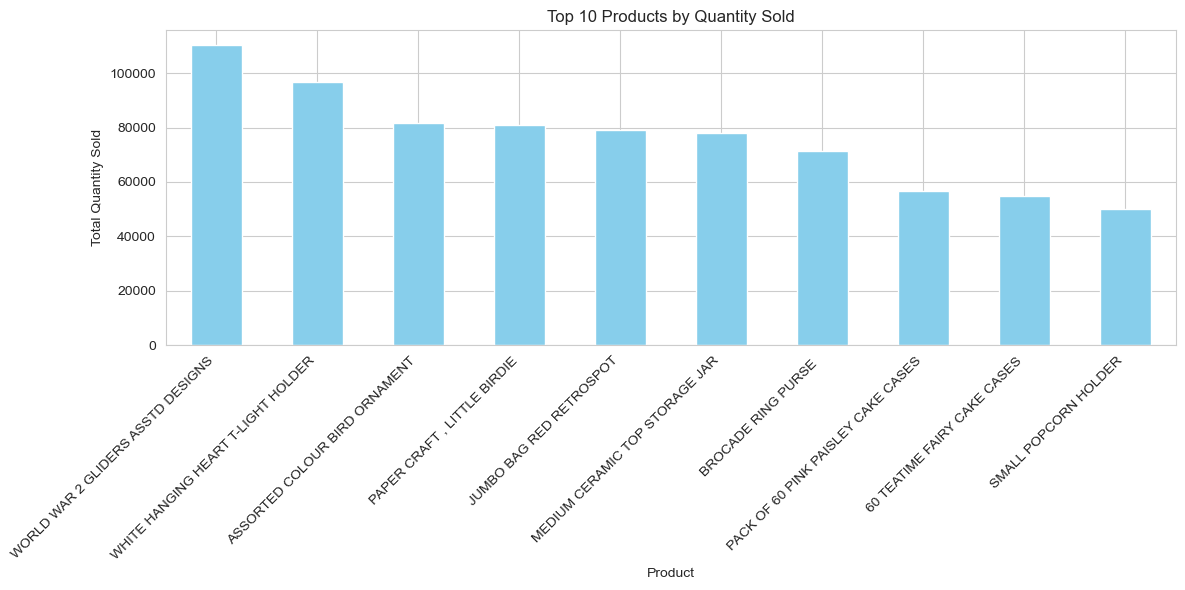

In [111]:
# Plot top products by quantity sold
plt.figure(figsize=(12, 6))
top_products_quantity['Quantity'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
top_products_revenue = product_sales.sort_values(by='Revenue', ascending=False).head(10)
top_products_revenue

,Quantity,Revenue
Description,,
REGENCY CAKESTAND 3 TIER,27594,344563.25
Manual,10063,341104.90
DOTCOM POSTAGE,1441,322657.48
WHITE HANGING HEART T-LIGHT HOLDER,96688,266923.55
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
JUMBO BAG RED RETROSPOT,79285,150935.56
PARTY BUNTING,28395,149187.05
ASSORTED COLOUR BIRD ORNAMENT,81817,132187.92
POSTAGE,5461,127597.42


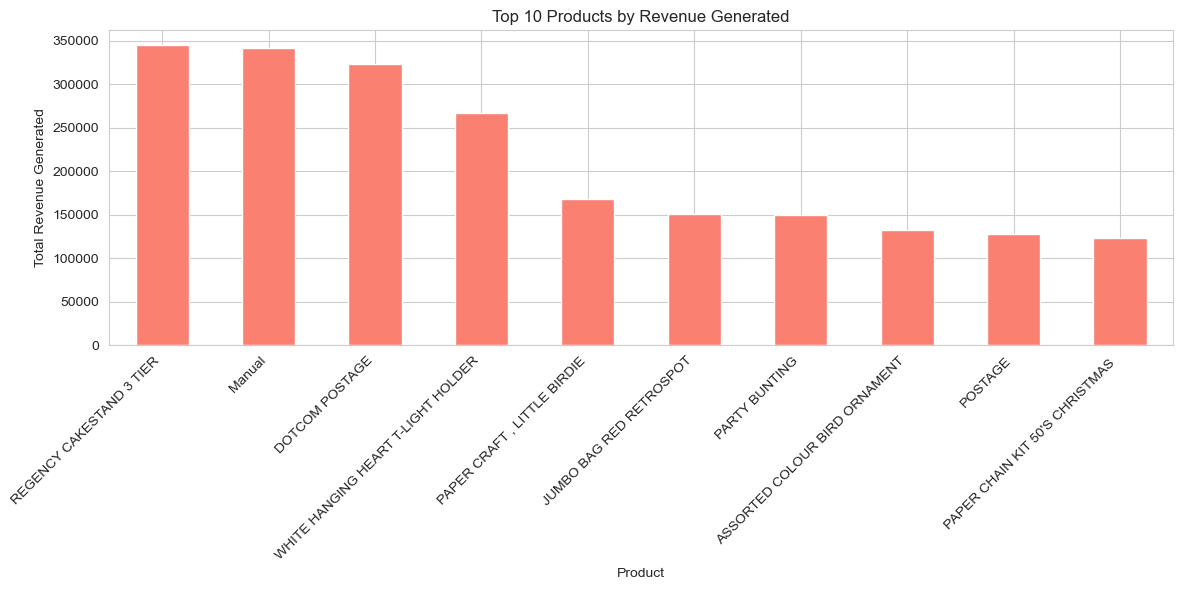

In [113]:
# Plot top products by revenue generated
plt.figure(figsize=(12, 6))
top_products_revenue['Revenue'].plot(kind='bar', color='salmon')
plt.title('Top 10 Products by Revenue Generated')
plt.xlabel('Product')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

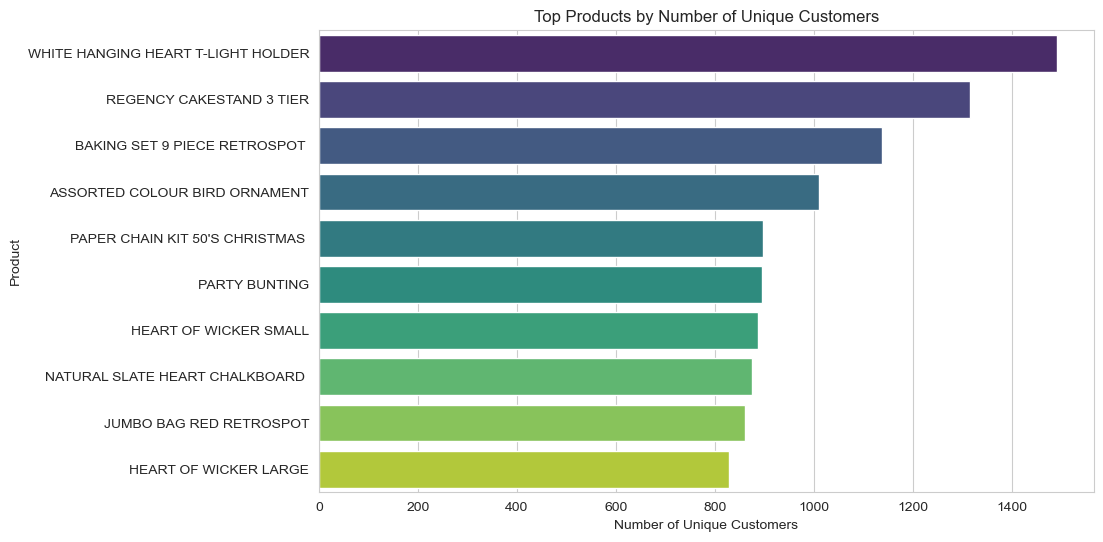

In [114]:
customer_engagement = df_cleaned.groupby('Description')['Customer ID'].nunique().reset_index()
customer_engagement.columns = ['Product', 'Number of Unique Customers']

# Visualize customer engagement metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_engagement.sort_values(by='Number of Unique Customers', ascending=False).head(10), x='Number of Unique Customers', y='Product', palette='viridis')
plt.title('Top Products by Number of Unique Customers')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Product')
plt.show()

#### From the above visualizations and tables:
#### 1.We can see the top 10 Products by Quantity Sold and also the top 10 products by revenue generated in both the charts there are different products, because some products might have higher price so even if the quantity sold is less the revenue will be more.
#### 2.We can see in the Top Products by Number of Unique Customers the products which have the highest number of unique(Distinct) customers in the graph.

### 3.Geographical Analysis


Sales by Country:
Country
United Kingdom     9451590
Netherlands         384617
EIRE                340564
France              275288
Denmark             237925
Germany             228003
Australia           104398
Sweden               88650
Switzerland          52885
Spain                50807
Belgium              35312
Japan                33327
Portugal             28409
Norway               27205
Channel Islands      21482
Name: Quantity, dtype: int64


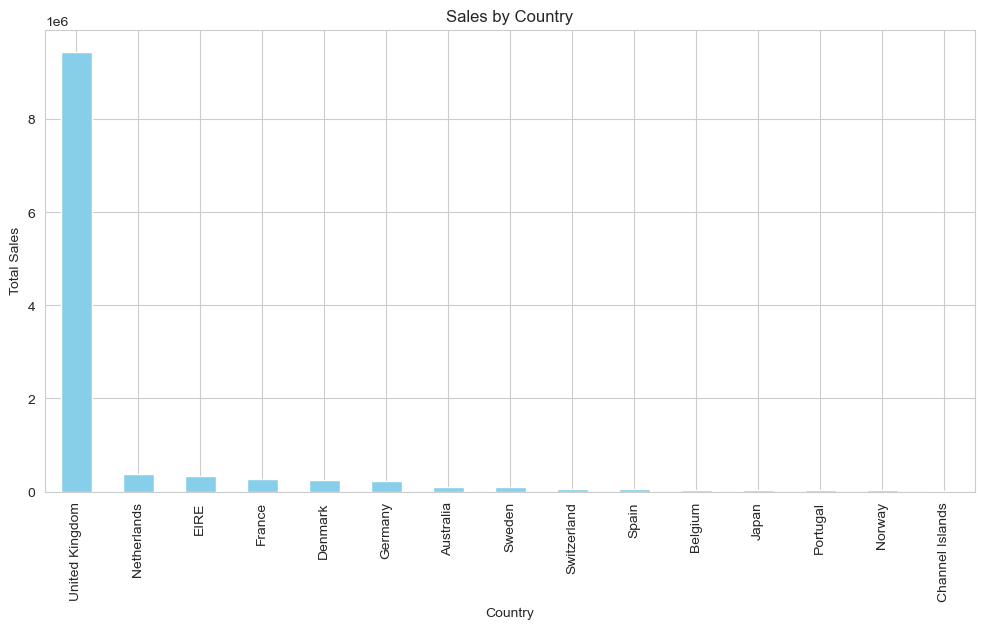

In [115]:
# Analyze sales and revenue by country
sales_by_country = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print("\nSales by Country:")
print(sales_by_country.head(15))

# Visualize sales by country
plt.figure(figsize=(12, 6))
sales_by_country_top10=sales_by_country.head(15)
sales_by_country_top10.plot(kind='bar', color='skyblue')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


Customer Distribution by Country:
Country
United Kingdom     5354
Germany             107
France               96
Spain                41
Belgium              29
Portugal             25
Switzerland          23
Netherlands          22
Sweden               20
Italy                17
Australia            15
Finland              14
Austria              13
Norway               13
Channel Islands      13
Name: Customer ID, dtype: int64


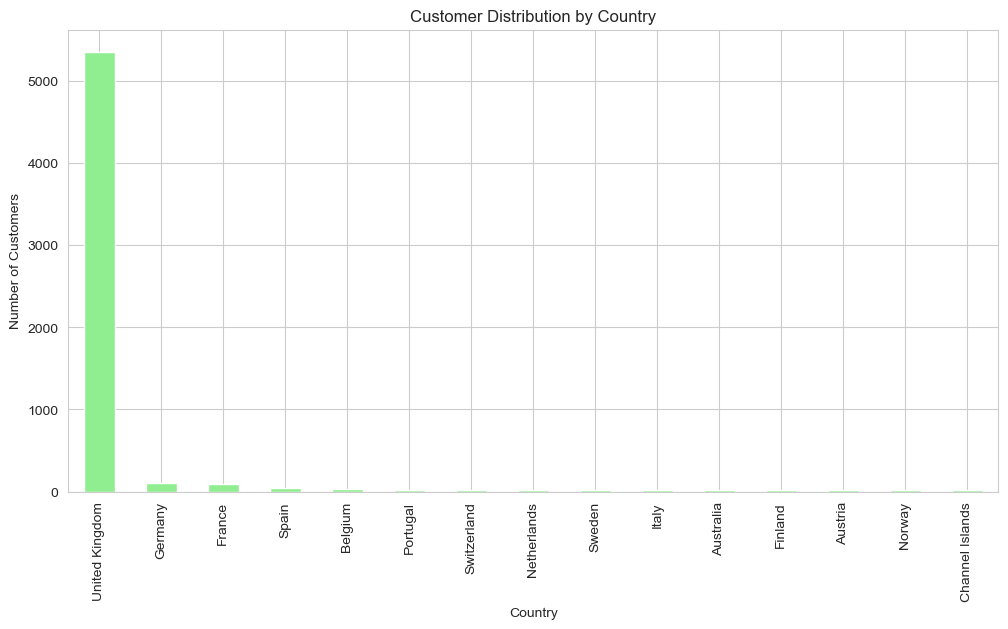

In [116]:
# Analyze customer distribution by country
customer_distribution = df_cleaned.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)
print("\nCustomer Distribution by Country:")
print(customer_distribution.head(15))

# Visualize customer distribution by country
plt.figure(figsize=(12, 6))
customer_distribution_top15=customer_distribution.head(15)
customer_distribution_top15.plot(kind='bar', color='lightgreen')
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

In [117]:
grouped_by_country = df_cleaned.groupby('Country')

# Initialize empty lists to store results
countries = []
aov_values = []

# Calculate AOV for each country
for country, group in grouped_by_country:
    # Calculate total revenue (sum of revenue)
    total_revenue = group['Revenue'].sum()
    
    # Calculate number of orders (unique invoices)
    num_orders = group['Invoice'].nunique()
    
    # Calculate Average Order Value (AOV)
    aov = total_revenue / num_orders
    
    # Append country and AOV to lists
    countries.append(country)
    aov_values.append(aov)

# Create a DataFrame to store AOV by country
aov_df = pd.DataFrame({'Country': countries, 'AOV': aov_values})

# Sort the DataFrame by AOV in descending order
aov_df = aov_df.sort_values(by='AOV', ascending=False)

# Display the AOV by country
print(aov_df.head(25))

                 Country          AOV
26           Netherlands  2420.228559
33             Singapore  2301.550909
0              Australia  1789.138000
10               Denmark  1624.702093
17             Hong Kong  1592.954667
37              Thailand  1535.270000
21                 Japan  1428.436061
28                Norway  1335.769333
4                Bermuda  1253.140000
31                   RSA  1201.080000
19                Israel  1133.466000
24             Lithuania  1092.290000
36           Switzerland  1086.142903
11                  EIRE  1061.392620
16                Greece  1060.899444
23               Lebanon   952.790000
25                 Malta   899.898889
35                Sweden   875.273524
7        Channel Islands   818.122909
34                 Spain   708.951494
5                 Brazil   705.935000
18               Iceland   704.165000
39  United Arab Emirates   693.601875
8                 Cyprus   675.138649
30              Portugal   610.701579


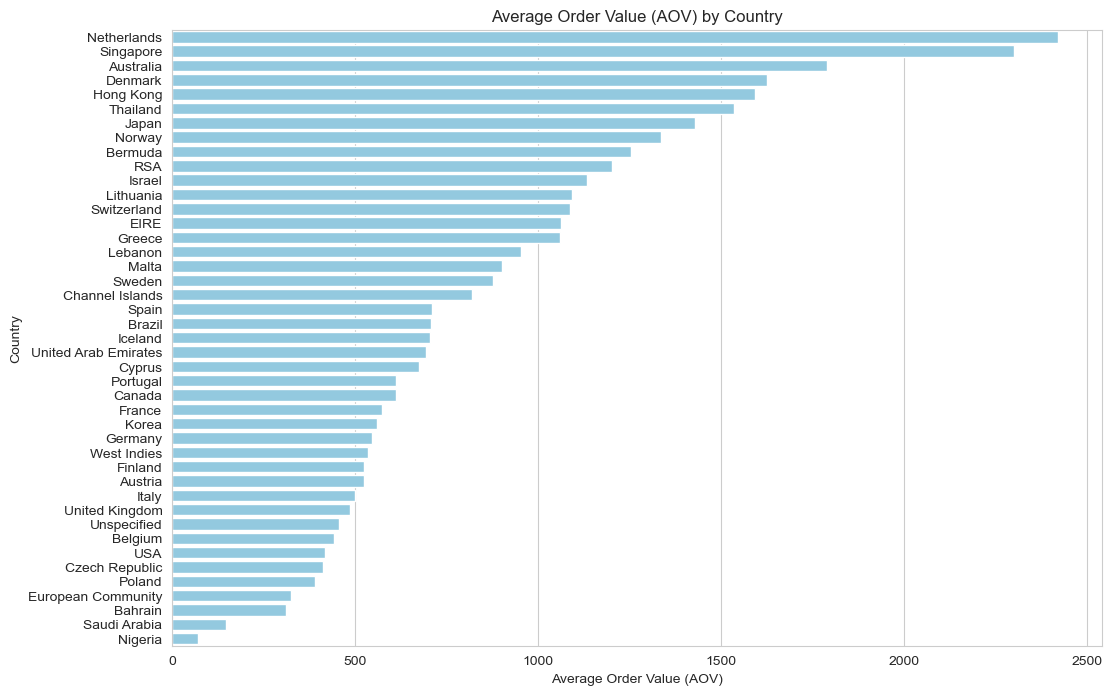

In [118]:
aov_df_sorted = aov_df.sort_values(by='AOV', ascending=False)

# Set plot style
sns.set_style("whitegrid")

# Set plot size
plt.figure(figsize=(12, 8))

# Create bar plot for AOV by country (descending order)
sns.barplot(x='AOV', y='Country', data=aov_df_sorted, color='skyblue')

# Add labels and title
plt.xlabel('Average Order Value (AOV)')
plt.ylabel('Country')
plt.title('Average Order Value (AOV) by Country')

# Show plot
plt.show()

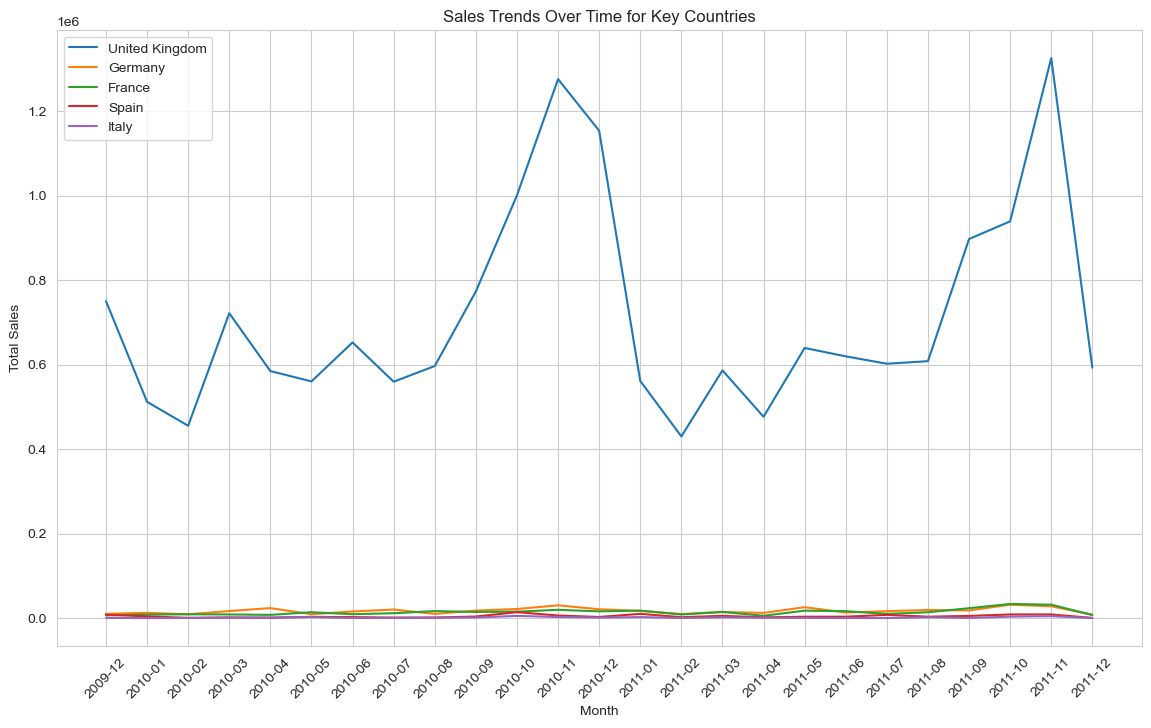

In [119]:
key_countries = ['United Kingdom', 'Germany', 'France', 'Spain', 'Italy']

# Filter the dataset for the key countries
df_key_countries = df_cleaned[df_cleaned['Country'].isin(key_countries)]

# Convert InvoiceDate to datetime
#df_key_countries['InvoiceDate'] = pd.to_datetime(df_key_countries['InvoiceDate'])

# Set plot style
sns.set_style("whitegrid")

# Set plot size
plt.figure(figsize=(14, 8))

# Plot sales trends over time for each key country
for country in key_countries:
    # Filter data for the current country
    country_data = df_key_countries[df_key_countries['Country'] == country]
    
    # Group by month and sum the sales
    monthly_sales = country_data.groupby(country_data['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
    
    # Plot sales trends for the current country
    plt.plot(monthly_sales.index.astype(str), monthly_sales, label=country)

# Add labels and title
plt.title('Sales Trends Over Time for Key Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.show()


#### From the results above:
#### 1.If we look at the sales by country and customer distribution by country we can see that it is mostly dominated by United Kingdom compared to other countries, So most of the business takes place in the United kingdom which is more than (approximately) 95%
#### 2.If we consider Average Order Value (AOV) then we can see from the graph that Netherlands has the highest (AOV) followed by Thailand, Australia, Bermuda, Denmark.
#### 3.If we look at sales trend in key counties the sales is mostly dominated by United kingdom and similar to overall trend of sales for United Kingdom, the sales in other countries more or less constant and very low with no trends or seasonality factor.

### 4.Customer Loyalty Analysis

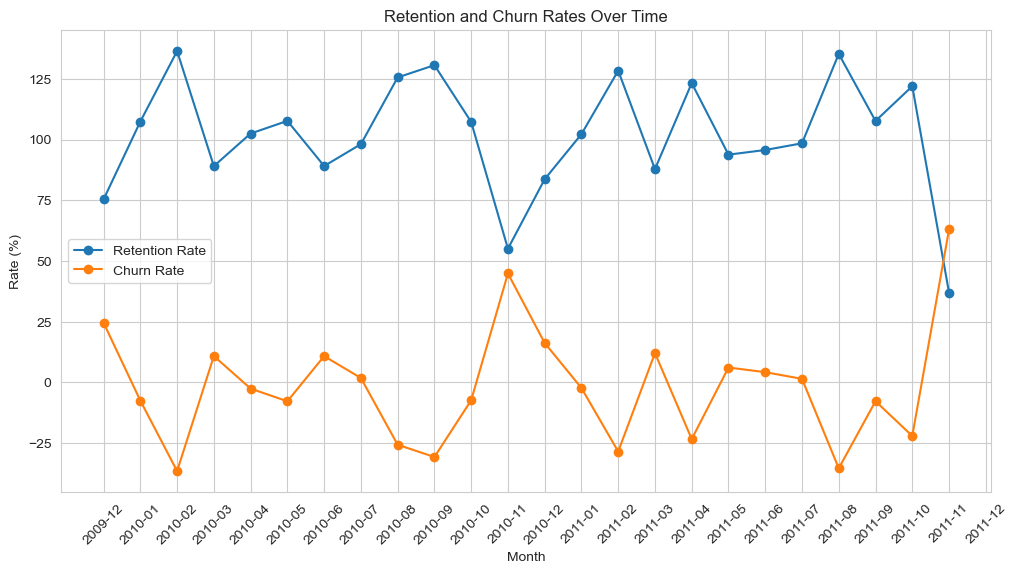

In [120]:
def calculate_retention_rate(df):
    # Group customers by month and count unique customers
    monthly_customers = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Customer ID'].nunique()
    
    # Calculate retention rate
    retention_rate = (monthly_customers.shift(-1) / monthly_customers) * 100
    return retention_rate

# Calculate churn rate
def calculate_churn_rate(df):
    # Group customers by month and count unique customers
    monthly_customers = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Customer ID'].nunique()
    
    # Calculate churn rate
    churn_rate = (1 - (monthly_customers.shift(-1) / monthly_customers)) * 100
    return churn_rate

# Calculate retention and churn rates
retention_rate = calculate_retention_rate(df_cleaned)
churn_rate = calculate_churn_rate(df_cleaned)

# Plot retention and churn rates over time
plt.figure(figsize=(12, 6))
plt.plot(retention_rate.index.astype(str), retention_rate.values, label='Retention Rate', marker='o', linestyle='-')
plt.plot(churn_rate.index.astype(str), churn_rate.values, label='Churn Rate', marker='o', linestyle='-')
plt.title('Retention and Churn Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### From the above graph we can see:
#### 1. Retention Rate: where we can see the retention rates month over month for 2 years, here the retention rate is high in january and goes back to low in february but again bounces back high from August and september which is like -1 month before the sales pick up.
#### 2. Churn Rate: Here we can see the churn rate is similar to sales trend where its starts picking up from september and hits the peak in november.

### 5.Customer Segmentation Analysis

In [121]:
rfm_df = df_cleaned.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (df_cleaned['InvoiceDate'].max() - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'Revenue': 'sum'       # Monetary
}).reset_index()

# Rename columns for clarity
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Define quartiles for RFM metrics
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Assign RFM scores to customers
def rfm_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

rfm_df['R'] = rfm_df['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# Combine RFM scores to get RFM segment
rfm_df['RFM_Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# Calculate RFM score
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

# Display RFM dataframe with segments and scores
print(rfm_df.head())

   CustomerID  Recency  Frequency    Monetary  R  F  M RFM_Segment  RFM_Score
0        -1.0        0       3322  3229538.96  1  4  4         144          9
1     12346.0      325         12    77556.46  3  4  4         344         11
2     12347.0        1          8     5633.32  1  4  4         144          9
3     12348.0       74          5     2019.40  2  3  3         233          8
4     12349.0       18          4     4428.69  1  3  4         134          8


In [122]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,-1.0,0,3322,3229538.96,1,4,4,144,9
1,12346.0,325,12,77556.46,3,4,4,344,11
2,12347.0,1,8,5633.32,1,4,4,144,9
3,12348.0,74,5,2019.40,2,3,3,233,8
4,12349.0,18,4,4428.69,1,3,4,134,8


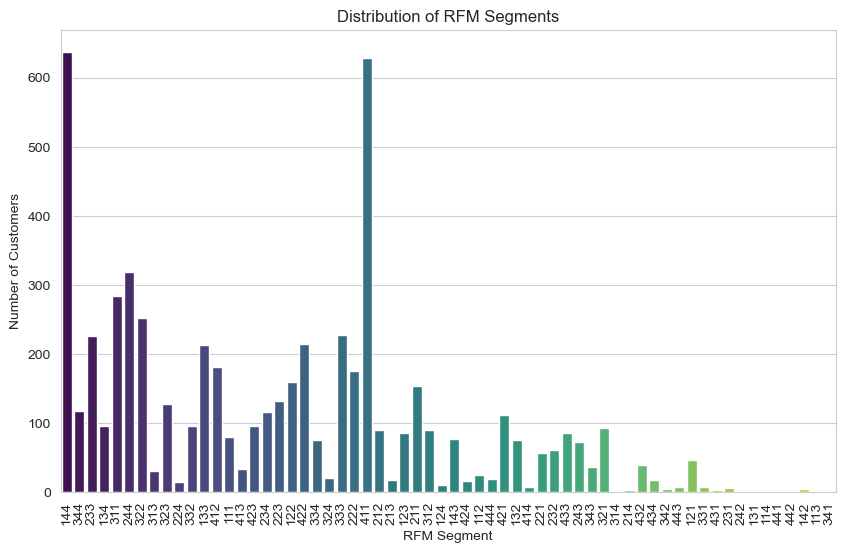

In [123]:
sns.set_style("whitegrid")

# Plot the distribution of RFM segments
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Segment', data=rfm_df, palette='viridis')
plt.title('Distribution of RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

In [124]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882 entries, 0 to 5881
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   5882 non-null   float64
 1   Recency      5882 non-null   int64  
 2   Frequency    5882 non-null   int64  
 3   Monetary     5882 non-null   float64
 4   R            5882 non-null   int64  
 5   F            5882 non-null   int64  
 6   M            5882 non-null   int64  
 7   RFM_Segment  5882 non-null   object 
 8   RFM_Score    5882 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 413.7+ KB


In [125]:
customer_id_df=rfm_df.groupby('CustomerID')['Monetary'].sum()

In [126]:
customer_id_df.head()

CustomerID
-1.0        3229538.96
 12346.0      77556.46
 12347.0       5633.32
 12348.0       2019.40
 12349.0       4428.69
Name: Monetary, dtype: float64

#### 1.We have done the Customer Segmentation Analysis Using RFM, here we have RFM (which is Recency, Frequency and Monetary) we get these values from (Invoice date, Unique invoice, and Revenue) respectively.
#### 2.We create 4 quartiles for RFM and label them (1,2,3,4) after that we calculate the score by combining the We get scores like 111,112,..etc this helps us understand the segmentation of customers(1 is the lower value and 4 is the higher value).
#### 3.From the graph we can see the distribution of RFM segments 
####   a.The highest customers are in 144 segment where there is low recency and high frequency and monetary value.
####   b.Most of the customers in 411 segment, Where there is high recency and low frequency and monetary value.
####   c.In the customer_id_df table we can see where ever there is no Customer ID there the moneatry value is high so people who have purchased the most have no Customer ID

In [127]:
### Thank You